In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import io

In [ ]:
df = pd.read_csv('test.csv',sep='|')
df.head(50)
df['company_size']

,company_size
0,201 - 500 pekerja
1,201 - 500 pekerja
2,NaN
3,501 - 1000 pekerja
4,1- 50 pekerja
...,...
2995,1- 50 pekerja
2996,501 - 1000 pekerja
2997,1- 50 pekerja
2998,51 - 200 pekerja


In [ ]:
df['company_size'].unique()

array(['201 - 500 pekerja', nan, '501 - 1000 pekerja', '1- 50 pekerja',
       '51 - 200 pekerja', '2001 - 5000 pekerja', '1001 - 2000 pekerja',
       'Lebih dari 5000 pekerja'], dtype=object)

In [ ]:
  # Ubah ke huruf kecil dan hilangkan spasi berlebih
df['company_size'] = df['company_size'].str.lower().str.strip()
df.head(3)
# standardisasi nilai
df['company_size'] = df['company_size'].replace({
    '1- 50 pekerja': '1-50',
    '51 - 200 pekerja': '51-200',
    '201 - 500 pekerja': '201-500',
    '501 - 1000 pekerja': '501-1000',
    '1001 - 2000 pekerja': '1001-2000',
    '2001 - 5000 pekerja': '2001-5000',
    'lebih dari 5000 pekerja': '5000+',
    'unknown': 'unknown',
    'not specified': 'unknown',
})
df['company_size'] = df['company_size'].fillna('unspecified')
df.head(50)

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary
0,31747,Developer Security Operation (DevSecOps),Jakarta Pusat,IDR,Pegawai (non-manajemen & non-supervisor),2 tahun,Sarjana (S1),Penuh Waktu,"Komputer/Teknologi Informasi,IT-Admin Jaringan...","Tip;Asuransi kesehatan;Parkir;Waktu regular, S...",18 days,201-500,Komputer/Teknik Informatika (Perangkat Lunak),1. Protect All Aspects of Your Source Cod...,7500000
1,31748,"Bancassurance Officer (Area: Bali, Sulawesi Ut...",Palu,IDR,Pegawai (non-manajemen & non-supervisor),1 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Penjualan / Pemasaran,Penjualan - Jasa Keuangan","Asuransi kesehatan;Waktu regular, Senin - Juma...",14 days,201-500,Asuransi,Bancassurance Officer adalah Representative da...,4100000
2,31749,Marketing Staff,Jakarta Utara,IDR,Pegawai (non-manajemen & non-supervisor),1 tahun,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",Penuh Waktu,"Penjualan / Pemasaran,Pemasaran/Pengembangan B...",NaN,NaN,unspecified,Manufaktur/Produksi,Bertanggung jawab atas penjualan sesuai dengan...,4875000
3,31750,Section Head Commercials,Jakarta Raya,IDR,Manajer/Asisten Manajer,3 tahun,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",Penuh Waktu,"Penjualan / Pemasaran,Penjualan Ritel",Uniform,NaN,501-1000,Retail/Merchandise,Tanggung Jawab :Bertanggung jawab atas keselur...,6750000
4,31751,Social Media HEAD,Aceh,IDR,Supervisor/Koordinator,3 tahun,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",Penuh Waktu,"Penjualan / Pemasaran,Digital Marketing",NaN,NaN,1-50,Makanan & Minuman/Katering/Restoran,# Memiliki pengalaman di atas# Harus memiliki ...,10680000
5,31752,Sales Manager,Jakarta Barat,IDR,Manajer/Asisten Manajer,5 tahun,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",Penuh Waktu,"Pelayanan,Logistik/Rantai Pasokan","Waktu regular, Senin - Jumat;Kasual (contoh: K...",NaN,1-50,Lainnya,a. Responsible for achieving all customer acco...,11750000
6,31753,PURCHASING IMPORT,Surabaya,IDR,Pegawai (non-manajemen & non-supervisor),2 tahun,"Sarjana (S1), Diploma Pascasarjana, Gelar Prof...",Penuh Waktu,"Manufaktur,Pembelian/Manajemen Material",NaN,NaN,unspecified,NaN,Urgently Need : PURCHASINGWe Want you to be a ...,6000000
7,31754,Backend Developer,Bali,IDR,Pegawai (non-manajemen & non-supervisor),5 tahun,Tidak terspesifikasi,Penuh Waktu,"Komputer/Teknologi Informasi,IT-Perangkat Lunak",Tunjangan Pendidikan;Tip;Asuransi kesehatan;Ol...,6 days,1-50,Komputer/Teknik Informatika (Perangkat Lunak),"Hello tech Indonesia,We hiring a new backend d...",20000000
8,31755,DOCUMENT CONTROL - MANDARIN SPEAKING,Bekasi,IDR,Supervisor/Koordinator,1 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Sumber Daya Manusia/Personalia,Sekretaris","Waktu regular, Senin - Jumat;THR, BPJS, Bonus,...",14 days,1-50,Transportasi/Logistik,Job Description：Controlling company and projec...,12500000
9,31756,Java Spring Boot / MVC,Jakarta Pusat,IDR,Pegawai (non-manajemen & non-supervisor),1 tahun,Tidak terspesifikasi,Penuh Waktu,"Komputer/Teknologi Informasi,IT-Perangkat Lunak","Asuransi kesehatan;Parkir;Waktu regular, Senin...",1 day,1-50,Komputer/Teknik Informatika (Perangkat Lunak),Experience 1 Year In Java (Spring Boot / Sprin...,7200000


In [ ]:
from pandas.api.types import CategoricalDtype

size_order = ['1-50', '51-200', '201-500', '501-1000', '1001-2000', '2001-5000', '5000+']
cat_type = CategoricalDtype(categories=size_order, ordered=True)
df['company_size'] = df['company_size'].astype(cat_type)
df['company_size'].value_counts().sort_index()


,count
company_size,
1-50,925
51-200,720
201-500,305
501-1000,201
1001-2000,172
2001-5000,101
5000+,97


In [ ]:
df.groupby('company_size')['salary'].mean()

/tmp/ipython-input-892810542.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('company_size')['salary'].mean()


,salary
company_size,
1-50,1.016555e+07
51-200,7.084645e+06
201-500,7.326261e+06
501-1000,6.614299e+06
1001-2000,7.282275e+06
2001-5000,6.423655e+06
5000+,7.308289e+06


In [ ]:
df[df['company_size'] == '1-50']['salary'].describe()

,salary
count,9.250000e+02
mean,1.016555e+07
std,6.586016e+07
min,1.500000e+01
25%,4.500000e+06
50%,5.750000e+06
75%,9.500000e+06
max,2.000000e+09


/tmp/ipython-input-2006207803.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gaji_rata2 = df.groupby('company_size')['salary'].mean().reset_index()


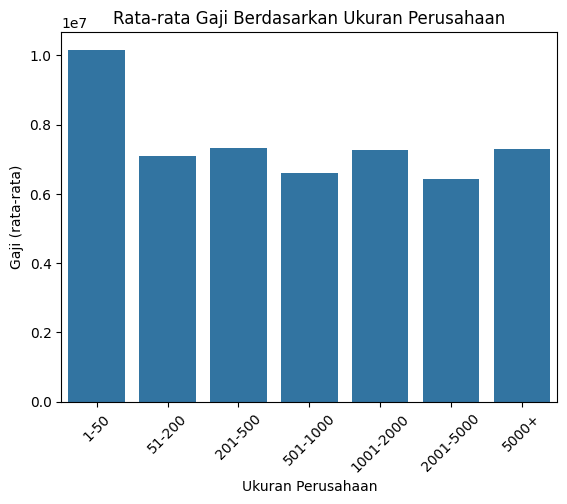

In [ ]:
gaji_rata2 = df.groupby('company_size')['salary'].mean().reset_index()

sns.barplot(x='company_size', y='salary', data=gaji_rata2)
plt.xticks(rotation=45)
plt.title('Rata-rata Gaji Berdasarkan Ukuran Perusahaan')
plt.ylabel('Gaji (rata-rata)')
plt.xlabel('Ukuran Perusahaan')
plt.show()


In [ ]:
df.groupby('company_size')['salary'].median()


/tmp/ipython-input-3842162163.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('company_size')['salary'].median()


,salary
company_size,
1-50,5750000.0
51-200,5750000.0
201-500,5520000.0
501-1000,5400000.0
1001-2000,5940000.0
2001-5000,5250000.0
5000+,5060000.0


In [ ]:
df.groupby(['company_size', 'career_level'])['salary'].mean().unstack()

/tmp/ipython-input-784235937.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['company_size', 'career_level'])['salary'].mean().unstack()


career_level,CEO/GM/Direktur/Manajer Senior,Lulusan baru/Pengalaman kerja kurang dari 1 tahun,Manajer/Asisten Manajer,Pegawai (non-manajemen & non-supervisor),Supervisor/Koordinator
company_size,,,,,
1-50,2.196667e+07,4.783017e+06,1.397623e+07,9.342187e+06,9.390306e+06
51-200,2.546667e+07,4.104333e+06,1.326278e+07,5.642450e+06,7.595694e+06
201-500,7.375000e+07,4.644375e+06,1.250532e+07,5.453667e+06,7.338957e+06
501-1000,1.250000e+07,4.748083e+06,1.261667e+07,4.778740e+06,7.050755e+06
1001-2000,3.500000e+07,4.740833e+06,1.600833e+07,5.257460e+06,7.375000e+06
2001-5000,1.750000e+07,4.348327e+06,1.166429e+07,5.039815e+06,7.718750e+06
5000+,NaN,3.283269e+06,1.314750e+07,6.389972e+06,8.703333e+06


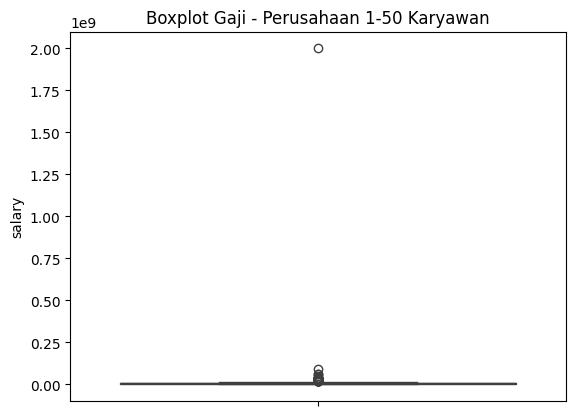

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df[df['company_size'] == '1-50'], y='salary')
plt.title('Boxplot Gaji - Perusahaan 1-50 Karyawan')
plt.show()

In [ ]:
df_cleaned = df[(df['company_size'] == '1-50') & (df['salary'] < 1e8)]
print(df_cleaned['salary'].describe())

count    9.240000e+02
mean     8.012049e+06
std      6.918464e+06
min      1.500000e+01
25%      4.500000e+06
50%      5.750000e+06
75%      9.500000e+06
max      9.000000e+07
Name: salary, dtype: float64


In [ ]:
df_cleaned = df[(df['company_size'] == '1-50') & (df['salary'] >= 1_000_000) & (df['salary'] <= 1_000_000_000)]


/tmp/ipython-input-4144864693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['log_salary'] = np.log1p(df_cleaned['salary'])  # log(1 + salary)


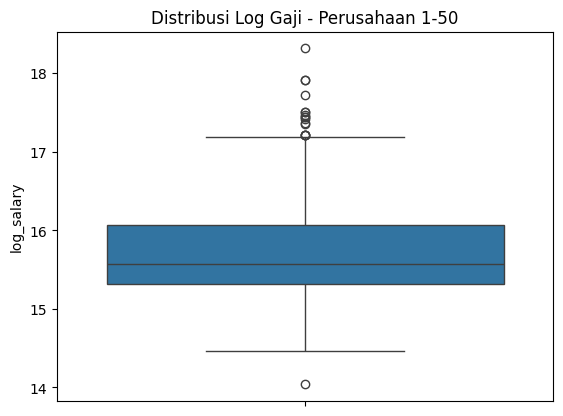

In [ ]:
import numpy as np

df_cleaned['log_salary'] = np.log1p(df_cleaned['salary'])  # log(1 + salary)

sns.boxplot(y='log_salary', data=df_cleaned)
plt.title('Distribusi Log Gaji - Perusahaan 1-50')
plt.show()


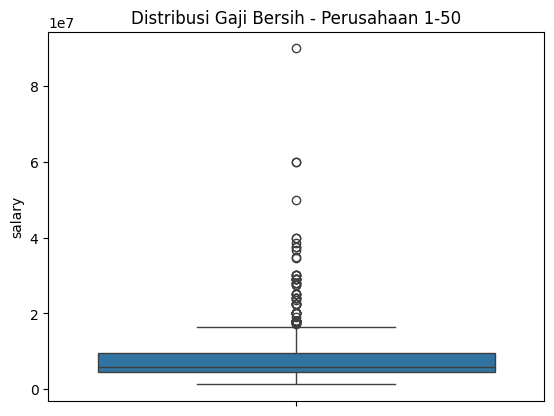

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df_cleaned, y='salary')
plt.title('Distribusi Gaji Bersih - Perusahaan 1-50')
plt.show()


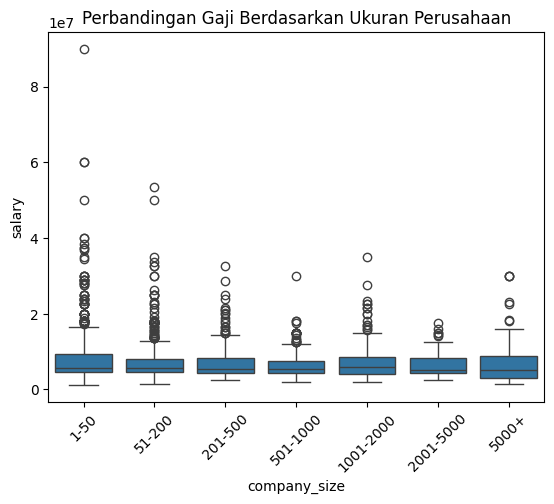

In [ ]:
df_filtered = df[(df['salary'] >= 1_000_000) & (df['salary'] <= 100_000_000)]

sns.boxplot(x='company_size', y='salary', data=df_filtered)
plt.xticks(rotation=45)
plt.title('Perbandingan Gaji Berdasarkan Ukuran Perusahaan')
plt.show()


In [ ]:
summary = df_filtered.groupby('company_size')['salary'].median().reset_index()
print(summary)


  company_size     salary
0         1-50  5750000.0
1       51-200  5750000.0
2      201-500  5520000.0
3     501-1000  5400000.0
4    1001-2000  5940000.0
5    2001-5000  5250000.0
6        5000+  5060000.0


/tmp/ipython-input-427570249.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df_filtered.groupby('company_size')['salary'].median().reset_index()


In [ ]:
# prompt: make a code that can categorized all of the data from the column career_level from test.csv

# Check unique values in 'career_level'
print(df['career_level'].unique())

# Convert 'career_level' to lowercase and strip extra whitespace
df['career_level'] = df['career_level'].str.lower().str.strip()
df.head(5)

['Pegawai (non-manajemen & non-supervisor)' 'Manajer/Asisten Manajer'
 'Supervisor/Koordinator'
 'Lulusan baru/Pengalaman kerja kurang dari 1 tahun'
 'CEO/GM/Direktur/Manajer Senior']


,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary
0,31747,Developer Security Operation (DevSecOps),Jakarta Pusat,IDR,pegawai (non-manajemen & non-supervisor),2 tahun,Sarjana (S1),Penuh Waktu,"Komputer/Teknologi Informasi,IT-Admin Jaringan...","Tip;Asuransi kesehatan;Parkir;Waktu regular, S...",18 days,201-500,Komputer/Teknik Informatika (Perangkat Lunak),1. Protect All Aspects of Your Source Cod...,7500000
1,31748,"Bancassurance Officer (Area: Bali, Sulawesi Ut...",Palu,IDR,pegawai (non-manajemen & non-supervisor),1 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Penjualan / Pemasaran,Penjualan - Jasa Keuangan","Asuransi kesehatan;Waktu regular, Senin - Juma...",14 days,201-500,Asuransi,Bancassurance Officer adalah Representative da...,4100000
2,31749,Marketing Staff,Jakarta Utara,IDR,pegawai (non-manajemen & non-supervisor),1 tahun,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",Penuh Waktu,"Penjualan / Pemasaran,Pemasaran/Pengembangan B...",NaN,NaN,NaN,Manufaktur/Produksi,Bertanggung jawab atas penjualan sesuai dengan...,4875000
3,31750,Section Head Commercials,Jakarta Raya,IDR,manajer/asisten manajer,3 tahun,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",Penuh Waktu,"Penjualan / Pemasaran,Penjualan Ritel",Uniform,NaN,501-1000,Retail/Merchandise,Tanggung Jawab :Bertanggung jawab atas keselur...,6750000
4,31751,Social Media HEAD,Aceh,IDR,supervisor/koordinator,3 tahun,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",Penuh Waktu,"Penjualan / Pemasaran,Digital Marketing",NaN,NaN,1-50,Makanan & Minuman/Katering/Restoran,# Memiliki pengalaman di atas# Harus memiliki ...,10680000


In [ ]:

career_level_mapping = {
    'pegawai (non-manajemen & non-supervisor)': 'entry level',
    'lulusan baru/pengalaman kerja kurang dari 1 tahun': 'internship',
    'manajer/asisten manajer': 'mid level',
    'supervisor/koordinator': 'management',
    'ceo/gm/direktur/manajer senior': 'executive',
    'not specified': 'unknown',
    'unknown': 'unknown'
}


df['career_level'] = df['career_level'].replace(career_level_mapping)


df['career_level'] = df['career_level'].fillna('unspecified')


career_order = [
    'internship',
    'entry level',
    'mid level',
    'management',
    'executive',
    'unknown',
    'unspecified'
]


career_cat_type = CategoricalDtype(categories=career_order, ordered=True)


df['career_level'] = df['career_level'].astype(career_cat_type)


print(df['career_level'].value_counts().sort_index())

career_level
internship      236
entry level    1782
mid level       410
management      512
executive        60
unknown           0
unspecified       0
Name: count, dtype: int64


/tmp/ipython-input-4273209240.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_salary_by_level_size = df.groupby(['company_size', 'career_level'])['salary'].median().reset_index()
/tmp/ipython-input-4273209240.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_salary_size = df_size.groupby('career_level')['salary'].median().reset_index()
/tmp/ipython-input-4273209240.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='career_level', y='sa

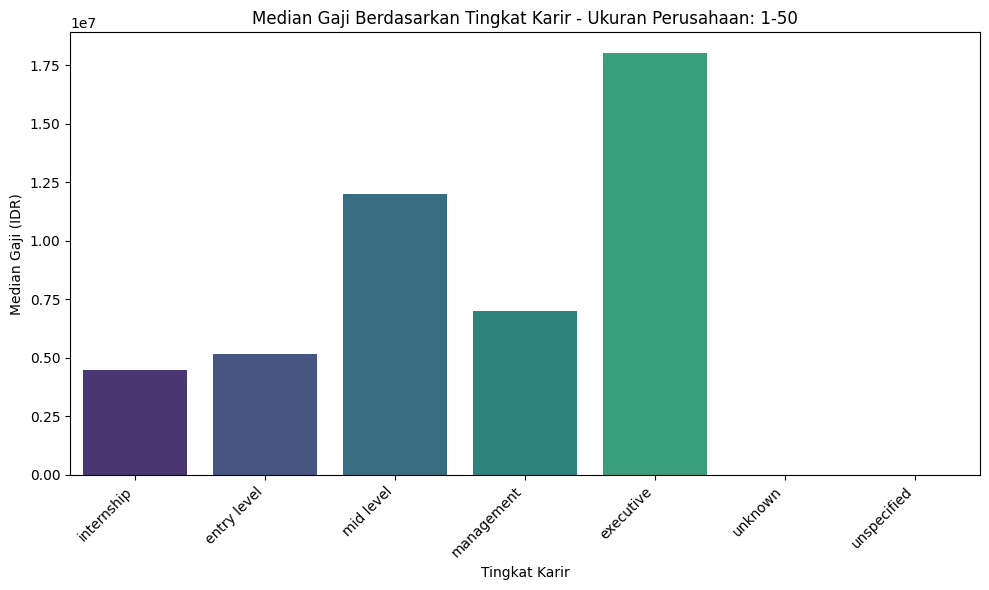

/tmp/ipython-input-4273209240.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_salary_size = df_size.groupby('career_level')['salary'].median().reset_index()
/tmp/ipython-input-4273209240.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='career_level', y='salary', data=median_salary_size, palette='viridis')


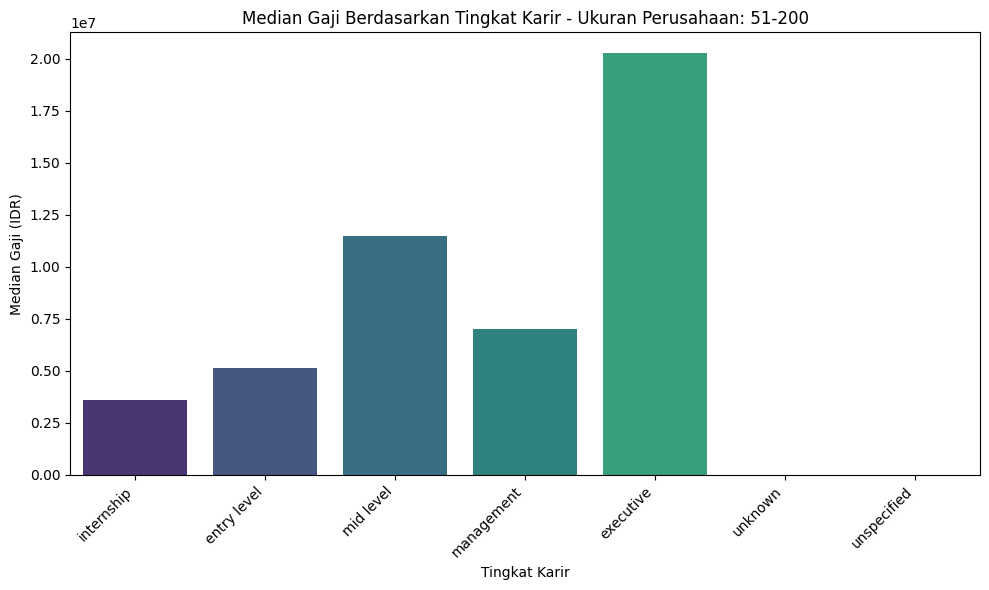

/tmp/ipython-input-4273209240.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_salary_size = df_size.groupby('career_level')['salary'].median().reset_index()
/tmp/ipython-input-4273209240.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='career_level', y='salary', data=median_salary_size, palette='viridis')


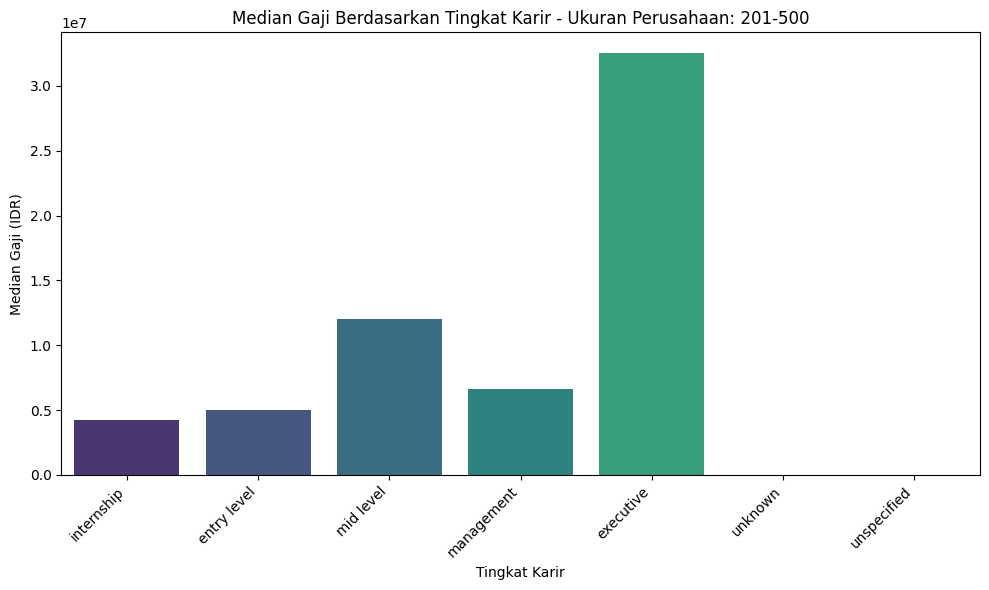

/tmp/ipython-input-4273209240.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_salary_size = df_size.groupby('career_level')['salary'].median().reset_index()
/tmp/ipython-input-4273209240.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='career_level', y='salary', data=median_salary_size, palette='viridis')


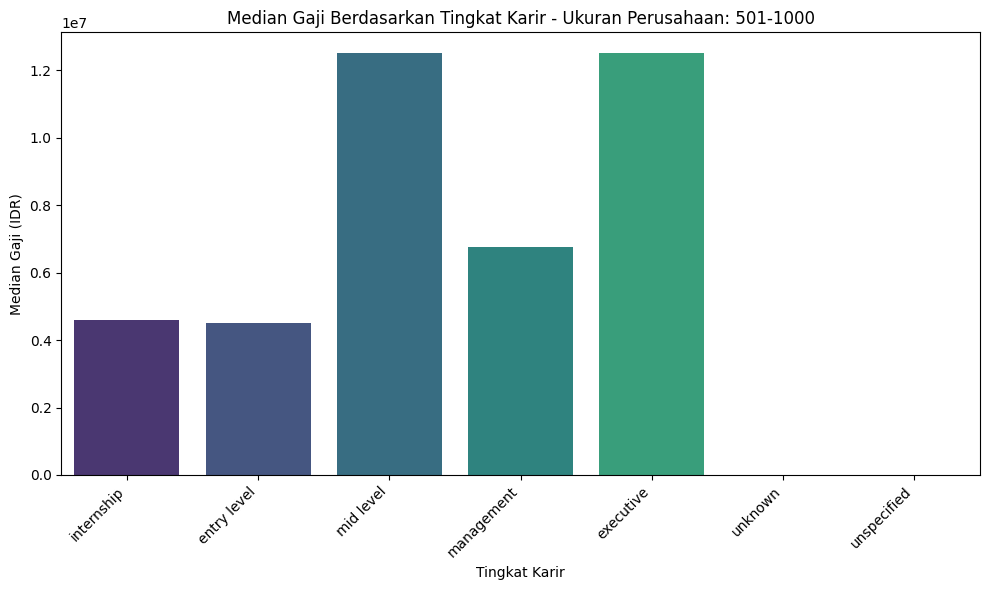

/tmp/ipython-input-4273209240.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_salary_size = df_size.groupby('career_level')['salary'].median().reset_index()
/tmp/ipython-input-4273209240.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='career_level', y='salary', data=median_salary_size, palette='viridis')


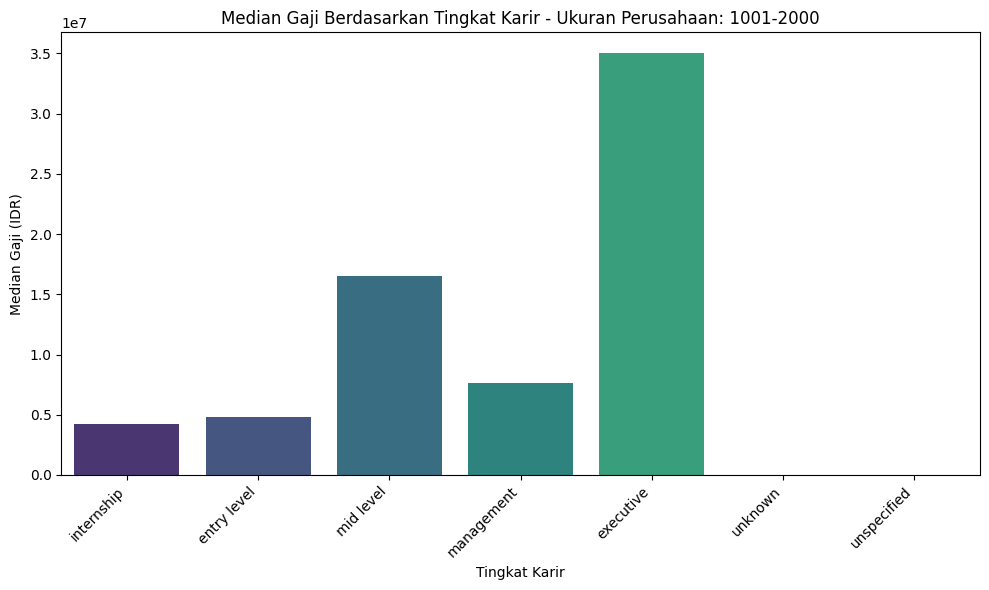

/tmp/ipython-input-4273209240.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_salary_size = df_size.groupby('career_level')['salary'].median().reset_index()
/tmp/ipython-input-4273209240.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='career_level', y='salary', data=median_salary_size, palette='viridis')


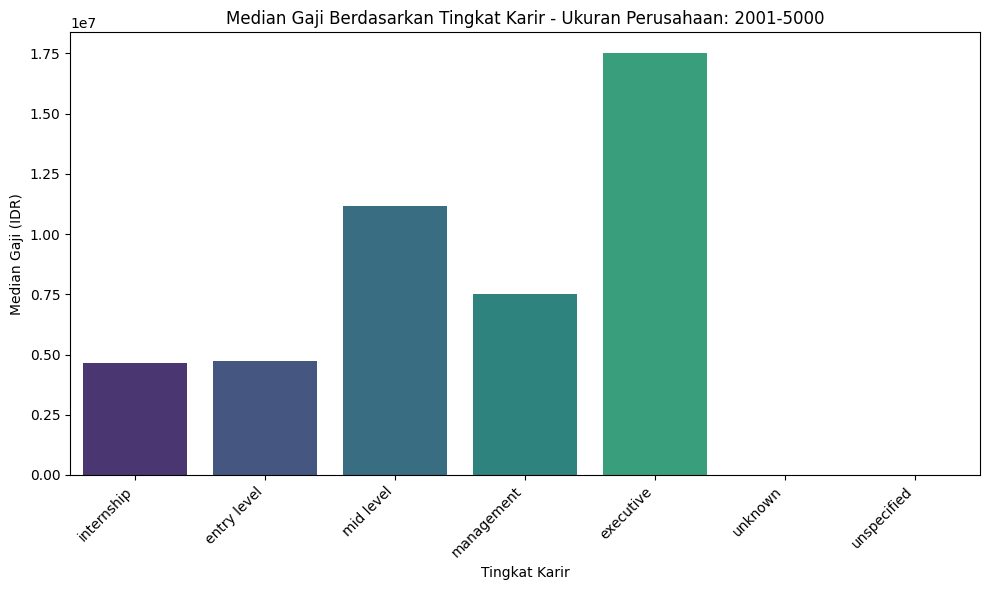

/tmp/ipython-input-4273209240.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_salary_size = df_size.groupby('career_level')['salary'].median().reset_index()
/tmp/ipython-input-4273209240.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='career_level', y='salary', data=median_salary_size, palette='viridis')


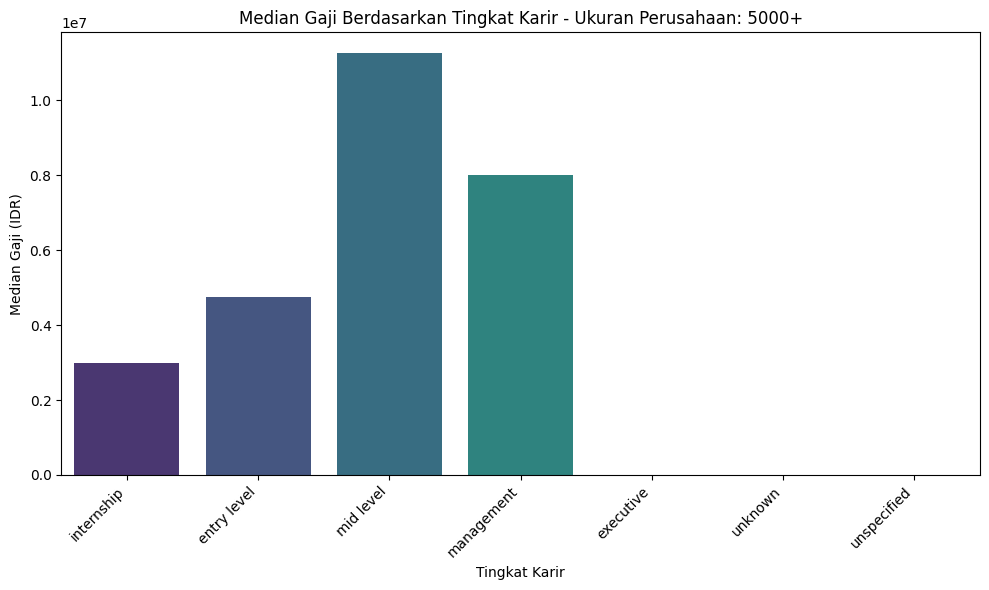

In [ ]:
# prompt: setelah mencategorykan career_level, hubungkan dengan median salary dan visualisasikan, lakukan untuk setiap ukuran perusahaan yang sudah di kategorikan juga

import matplotlib.pyplot as plt
# Menghitung median salary untuk setiap kombinasi career_level dan company_size
median_salary_by_level_size = df.groupby(['company_size', 'career_level'])['salary'].median().reset_index()

# Filter data untuk rentang gaji yang relevan
df_filtered = df[(df['salary'] >= 1_000_000) & (df['salary'] <= 100_000_000)]

# Visualisasi untuk setiap ukuran perusahaan
for size in size_order:
    # Filter data untuk ukuran perusahaan saat ini
    df_size = df_filtered[df_filtered['company_size'] == size]

    # Hitung median gaji berdasarkan career_level untuk ukuran perusahaan ini
    median_salary_size = df_size.groupby('career_level')['salary'].median().reset_index()

    # Buat bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='career_level', y='salary', data=median_salary_size, palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Median Gaji Berdasarkan Tingkat Karir - Ukuran Perusahaan: {size}')
    plt.ylabel('Median Gaji (IDR)')
    plt.xlabel('Tingkat Karir')
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-1022938260.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_salary_level = df_level.groupby('company_size')['salary'].median().reset_index()
/tmp/ipython-input-1022938260.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='company_size', y='salary', data=median_salary_level, palette='viridis')


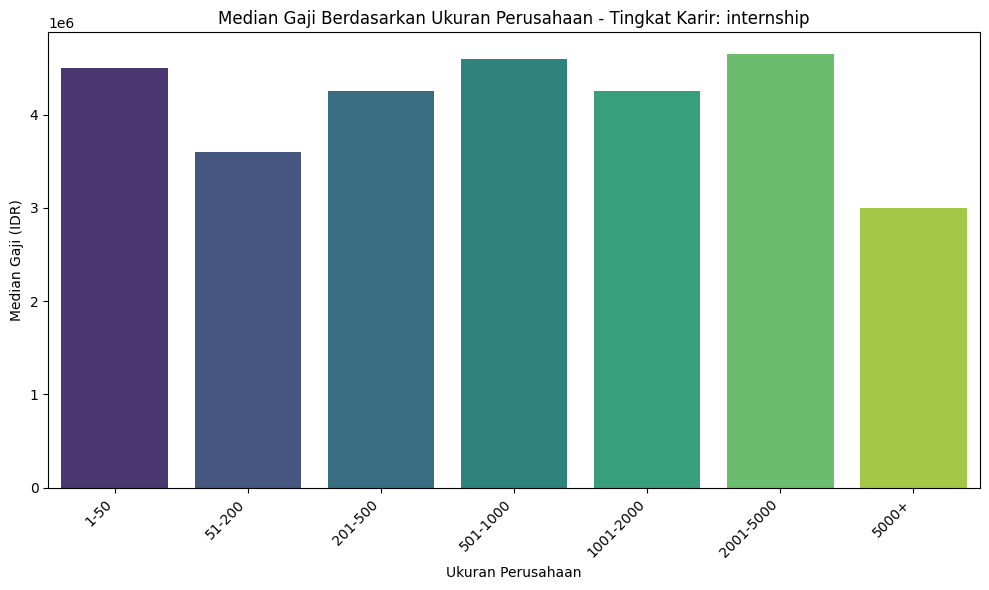

/tmp/ipython-input-1022938260.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_salary_level = df_level.groupby('company_size')['salary'].median().reset_index()
/tmp/ipython-input-1022938260.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='company_size', y='salary', data=median_salary_level, palette='viridis')


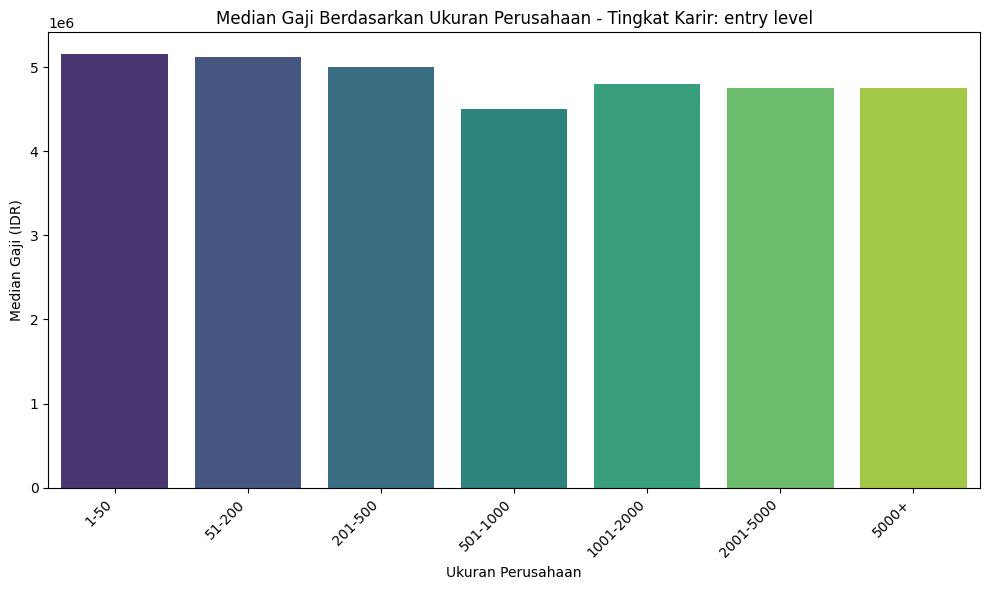

/tmp/ipython-input-1022938260.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_salary_level = df_level.groupby('company_size')['salary'].median().reset_index()
/tmp/ipython-input-1022938260.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='company_size', y='salary', data=median_salary_level, palette='viridis')


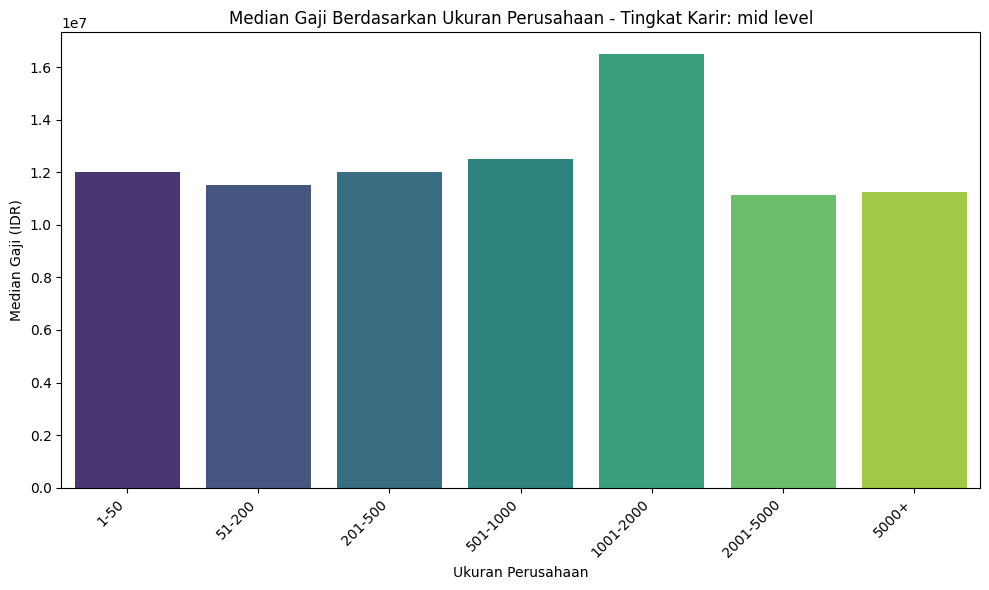

/tmp/ipython-input-1022938260.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_salary_level = df_level.groupby('company_size')['salary'].median().reset_index()
/tmp/ipython-input-1022938260.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='company_size', y='salary', data=median_salary_level, palette='viridis')


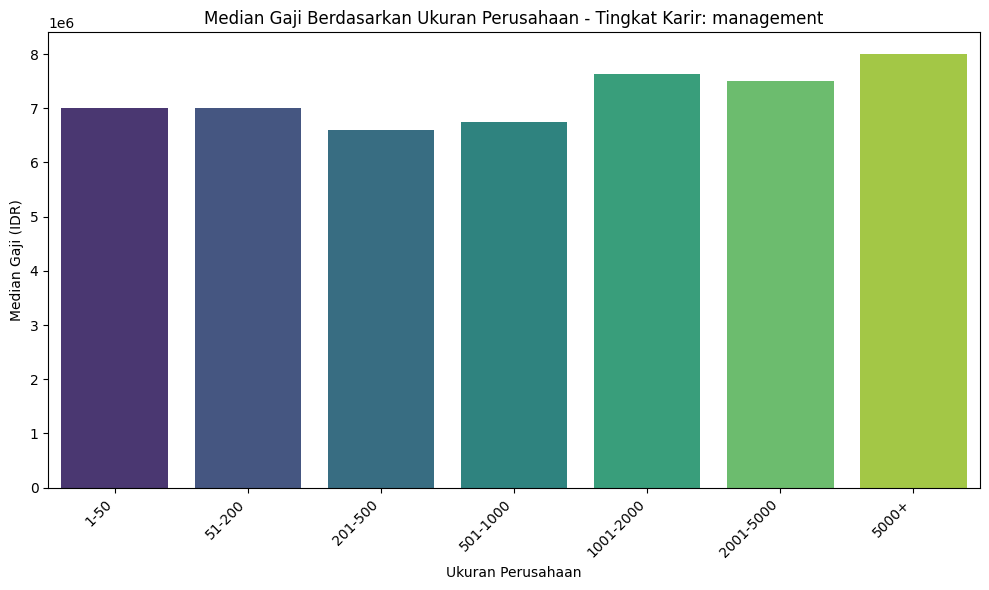

/tmp/ipython-input-1022938260.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_salary_level = df_level.groupby('company_size')['salary'].median().reset_index()
/tmp/ipython-input-1022938260.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='company_size', y='salary', data=median_salary_level, palette='viridis')


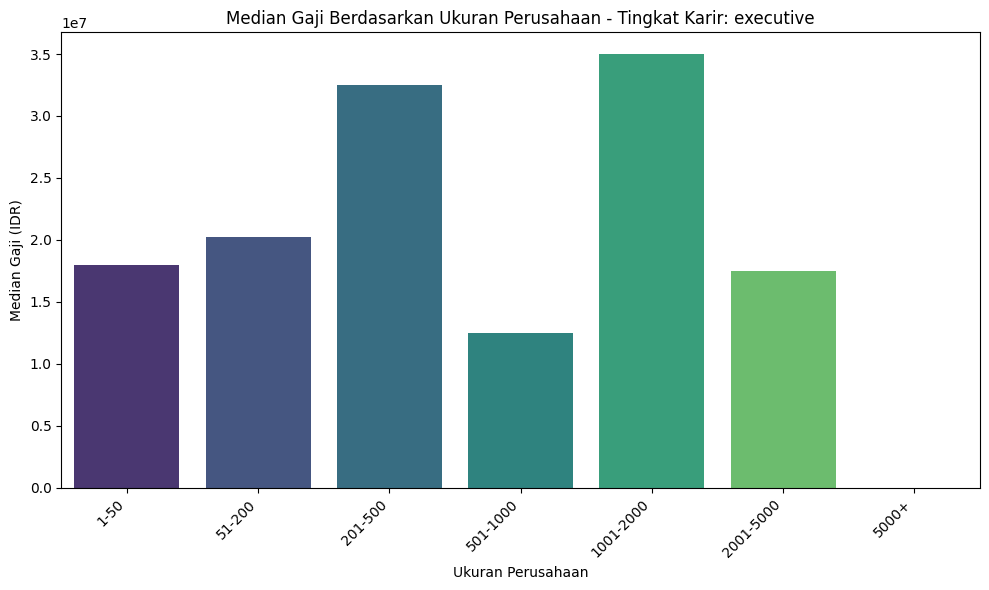

/tmp/ipython-input-1022938260.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_salary_level = df_level.groupby('company_size')['salary'].median().reset_index()
/tmp/ipython-input-1022938260.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='company_size', y='salary', data=median_salary_level, palette='viridis')


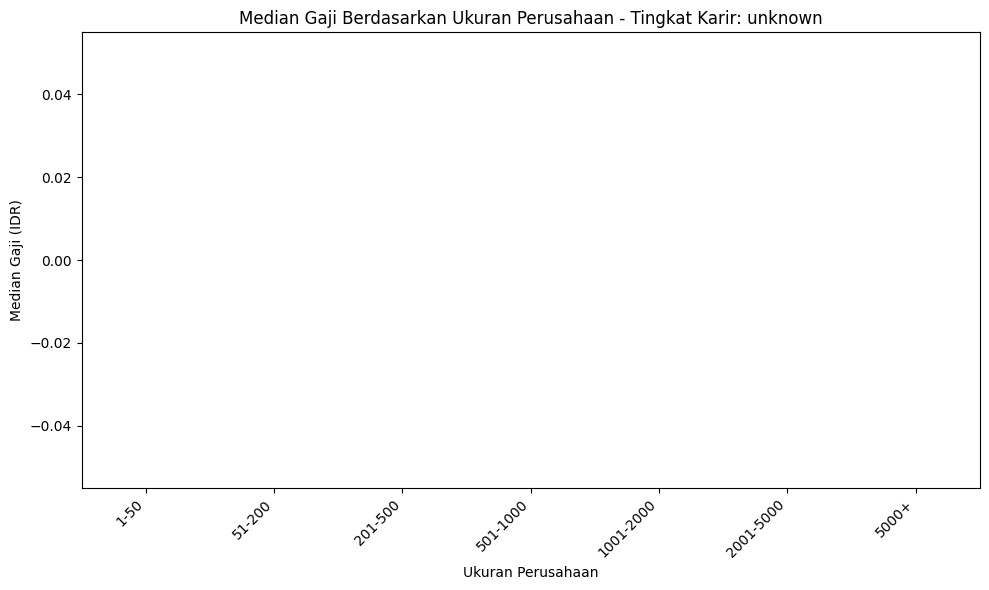

/tmp/ipython-input-1022938260.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_salary_level = df_level.groupby('company_size')['salary'].median().reset_index()
/tmp/ipython-input-1022938260.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='company_size', y='salary', data=median_salary_level, palette='viridis')


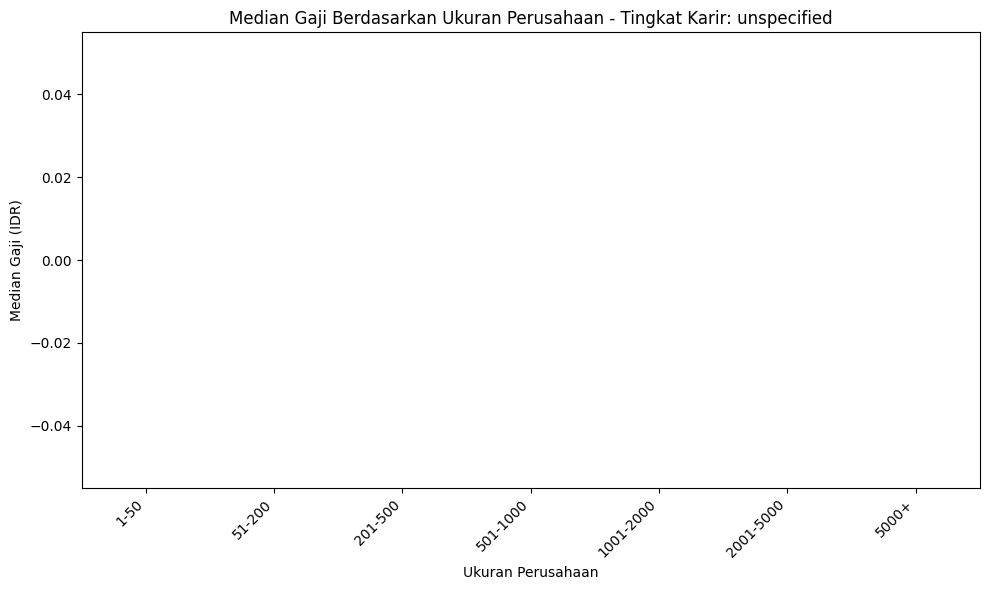

/tmp/ipython-input-1022938260.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_salary_pivot = df_filtered.groupby(['company_size', 'career_level'])['salary'].median().unstack()


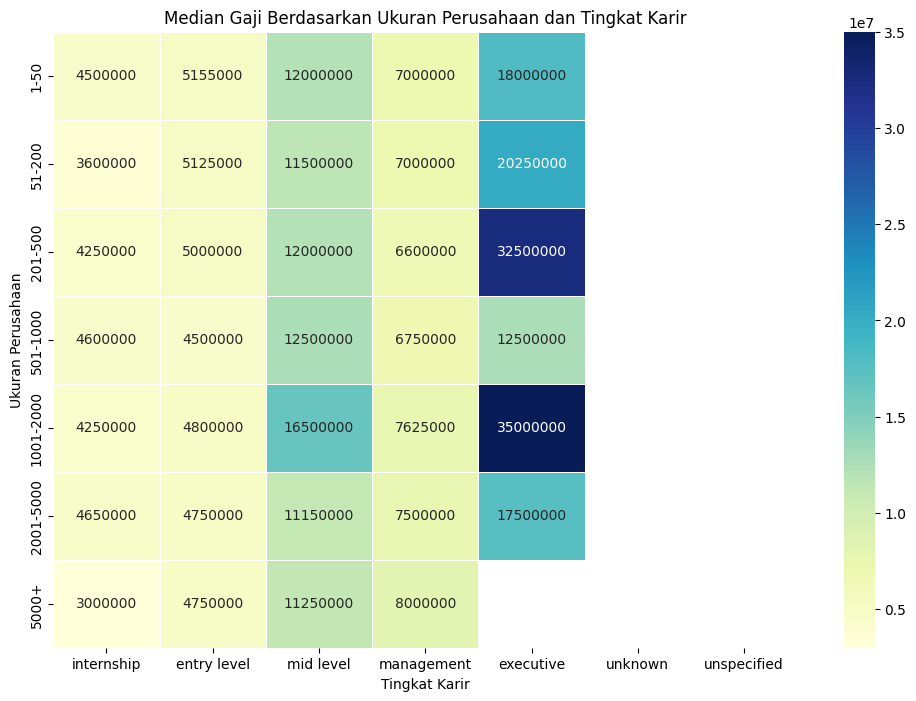

In [ ]:
# prompt: dari hasil visualisasi tersebut buatkan code yang bisa membandingkan hasil dari setiap perusahaan dan setiap level

import matplotlib.pyplot as plt
# Visualisasi untuk setiap tingkat karir
for level in career_order:
    # Filter data untuk tingkat karir saat ini
    df_level = df_filtered[df_filtered['career_level'] == level]

    # Hitung median gaji berdasarkan company_size untuk tingkat karir ini
    median_salary_level = df_level.groupby('company_size')['salary'].median().reset_index()

    # Buat bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='company_size', y='salary', data=median_salary_level, palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Median Gaji Berdasarkan Ukuran Perusahaan - Tingkat Karir: {level}')
    plt.ylabel('Median Gaji (IDR)')
    plt.xlabel('Ukuran Perusahaan')
    plt.tight_layout()
    plt.show()

# Anda juga bisa membuat heatmap untuk melihat perbandingan semua kombinasi
median_salary_pivot = df_filtered.groupby(['company_size', 'career_level'])['salary'].median().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(median_salary_pivot, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title('Median Gaji Berdasarkan Ukuran Perusahaan dan Tingkat Karir')
plt.xlabel('Tingkat Karir')
plt.ylabel('Ukuran Perusahaan')
plt.show()

In [ ]:
import pandas as pd

# Pastikan data bersih dulu
df_filtered = df[(df['salary'] >= 1_000_000) & (df['salary'] <= 100_000_000)]
df_filtered = df_filtered.dropna()

# Simpan data yang akan digunakan ke Tableau
df_filtered[['company_size', 'salary']].to_csv('gaji_perusahaaN.csv', index=False)


In [ ]:
median_salary = df_filtered.groupby('company_size')['salary'].median().reset_index()
median_salary.dropna()
median_salary.to_csv('median_gaji_perusahaan.csv', index=False)


/tmp/ipython-input-225786679.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_salary = df_filtered.groupby('company_size')['salary'].median().reset_index()


In [ ]:
print(df['salary'].dtype)
df['salary'] = df['salary'].replace('[^0-9]', '', regex=True).astype(float)
mean_salary = df_filtered.groupby('company_size')['salary'].mean().reset_index()
print(mean_salary)
mean_salary.to_csv('mean_salary_corrected.csv', index=False)

int64
  company_size        salary
0         1-50  7.442254e+06
1       51-200  6.874983e+06
2      201-500  7.073903e+06
3     501-1000  6.775242e+06
4    1001-2000  7.211377e+06
5    2001-5000  7.315128e+06
6        5000+  8.936509e+06


/tmp/ipython-input-1406048041.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_salary = df_filtered.groupby('company_size')['salary'].mean().reset_index()


In [ ]:
career_level_salary = df_filtered.groupby('career_level')['salary'].median().reset_index()
career_level_salary.to_csv('median_gaji_karier.csv', index=False)

/tmp/ipython-input-3677454496.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  career_level_salary = df_filtered.groupby('career_level')['salary'].median().reset_index()


In [ ]:
combo_salary = df_filtered.groupby(['company_size', 'career_level'])['salary'].median().reset_index()
combo_salary.to_csv('gaji_perusahaan_karier.csv', index=False)


/tmp/ipython-input-3744035612.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  combo_salary = df_filtered.groupby(['company_size', 'career_level'])['salary'].median().reset_index()
